<a href="https://colab.research.google.com/github/tigon4ik/vis_hw/blob/hw3/vis_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 3 - расположение меток/подписей (label placement)
#### Дарбинян Оганес
##### 2-SAT

In [70]:
!git clone https://github.com/tigon4ik/vis_hw.git && cd vis_hw && git checkout hw3

fatal: destination path 'vis_hw' already exists and is not an empty directory.


In [71]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [72]:

test1 = '''
20,20	10,10	0,0 0,10 10,10
20,25	10,10	0,0 10,0 0,10 10,10
25,20	10,10	10,0 10,10
25,25	10,10	10,0 0,10
'''


class Pos:
    def __init__(self, *arr):
        assert len(arr) == 2
        self.xy = arr
    
    def __add__(self, that):
        return [a + b for a, b in zip(self.xy, that.xy)]
    
    def __sub__(self, that):
        return [a - b for a, b in zip(self.xy, that.xy)]
    
    def __neg__(self):
        return [-a for a in self.xy]
    
    def __str__(self):
        return str(self.xy)
    
    def __repr__(self):
        return str(self)
    
    def parse(s):
        arr = [int(a) for a in s.split(',')]
        return Pos(*arr)


class Box:
    def __init__(self, line):
        arr = line.split('\t')
        self.pos = Pos.parse(arr[0])
        self.size = Pos.parse(arr[1])
        self.offsets = [Pos.parse(pos) for pos in arr[2].split(' ')]
        assert len(self.offsets) > 0
    
    def __str__(self):
        return 'Box(pos={}, size={}, offsets={})'.format(self.pos, self.size, self.offsets)
    
    def __repr__(self):
        return str(self)


# boxes = [Box(line) for line in raw_data.strip().split('\n')]
# print(boxes)


In [73]:
def get_boxes(data):
    return [Box(line) for line in data.strip().split('\n')]

In [74]:
boxes1 = get_boxes(test1)

In [75]:
def rent_col(l1, r1, l2, r2):
    if (l1.xy[0] == r1.xy[0] or l1.xy[1] == r1.xy[1] or l2.xy[0] == r2.xy[0] or l2.xy[1] == r2.xy[1]):
        # the line cannot have positive overlap
        return False
       
     
    # If one rectangle is on left side of other
    if(l1.xy[0] >= r2.xy[0] or l2.xy[0] >= r1.xy[0]):
        return False
 
    # If one rectangle is above other
    if(l1.xy[1] >= r2.xy[1] or l2.xy[1] >= r1.xy[1]):
        return False
 
    return True

In [76]:
def isCollide(boxes, I, J):
    b1 = boxes[I]
    b2 = boxes[J]
    plc = [(0, 0), (0, 1), (1, 0), (1, 1)]
    pos1 = b1.pos
    pos2 = b2.pos
    size1 = b1.size
    size2 = b2.size
    cols = []
    for i, j in plc:
        b1_off = b1.offsets[i]
        b2_off = b2.offsets[j]
        l1 = Pos(*(pos1 - b1_off))
        l2 = Pos(*(pos2 - b2_off))
        r1 = Pos(*(l1 + size1))
        r2 = Pos(*(l2 + size2))
#         print(l1, r1, l2, r2)
        if rent_col(
            l1, r1, l2, r2
        ):
            cols.append((i, j))
    return cols

In [77]:
def make_cond(cond, I, J):
    return lambda x: (cond[0] + x[I]) % 2 or (cond[1] + x[J]) % 2

In [78]:
def get_funcs(boxes):
    funcs = []
    n = len(boxes)
    for i in range(n):
        for j in range(i+1, n):
            bad_poses = isCollide(boxes, i, j)
            for pos in bad_poses:
                funcs.append(make_cond(pos, i, j))
    return funcs

In [79]:
def find_optim(funcs, n):
    for i in range(2 ** n):
        places = [int(x) for x in bin(i)[2:].zfill(n)]
        res = 1
        for f in funcs:
            res *= f(places)
        if res == 1:
            break
    return res, places

In [80]:
def get_plotting_data(boxes, poses):
    coord = []
    sizes = []
    labels = []
    for i, box in enumerate(boxes):
        coord.append(box.pos.xy)
        sizes.append(box.size.xy)
        label = box.pos - box.offsets[poses[i]]
#         label[1] -= box.size.xy[1]
        labels.append(label)
    return coord, sizes, labels

In [93]:
def draw_labels(boxes):
    n = len(boxes)
    res, places = find_optim(get_funcs(boxes), n)
    if res:
        fig, ax = plt.subplots(dpi=100, figsize=(10, 10))
        dots, sizes, labels = get_plotting_data(boxes, places)
        for i in range(n):
            ax.add_patch(Rectangle(labels[i], sizes[i][0], sizes[i][1],
                     edgecolor = 'black',
                     fill=False,
                     lw=2))
            ax.scatter(*dots[i], color = 'red', s=200)
            text_coord = (labels[i][0] + (sizes[i][0]/2 - 4/20), labels[i][1] + (sizes[i][1]/2 - 4/20))
            ax.annotate(str(i), dots[i], xytext=text_coord)
        plt.show()
    else:
        print("ERROR!!! There isn't optimal way to print labels")

In [82]:
draw_labels(boxes1)

ERROR!!! There isn't optimal way to print labels


In [83]:
with open('vis_hw/bin1.txt') as f:
    boxes1 = get_boxes(f.read())

In [84]:
with open('vis_hw/bin2.txt') as f:
    boxes2 = get_boxes(f.read())

In [85]:
with open('vis_hw/bin3.txt') as f:
    boxes3 = get_boxes(f.read())

In [86]:
with open('vis_hw/bin4.txt') as f:
    boxes4 = get_boxes(f.read())

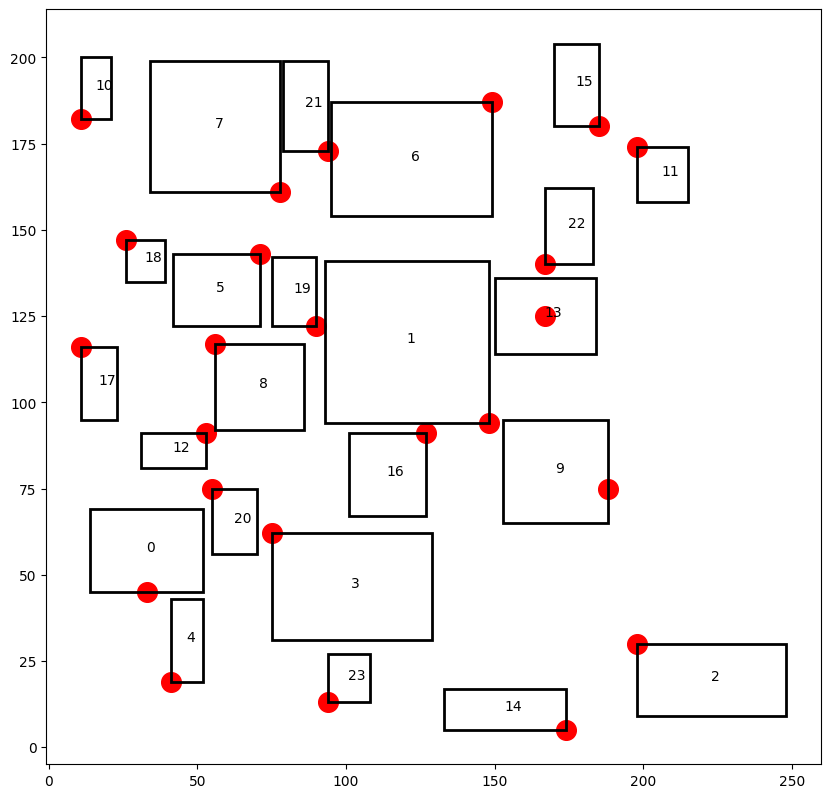

CPU times: user 1min 49s, sys: 273 ms, total: 1min 49s
Wall time: 1min 50s


In [94]:
%%time
draw_labels(boxes1)

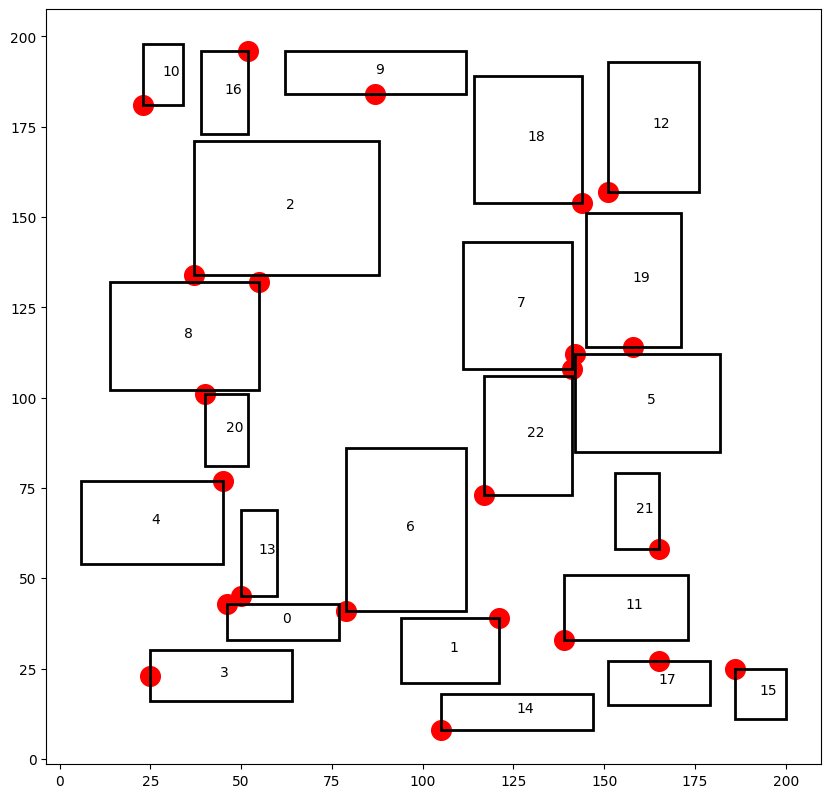

CPU times: user 53.8 s, sys: 167 ms, total: 54 s
Wall time: 54.9 s


In [95]:
%%time
draw_labels(boxes2)

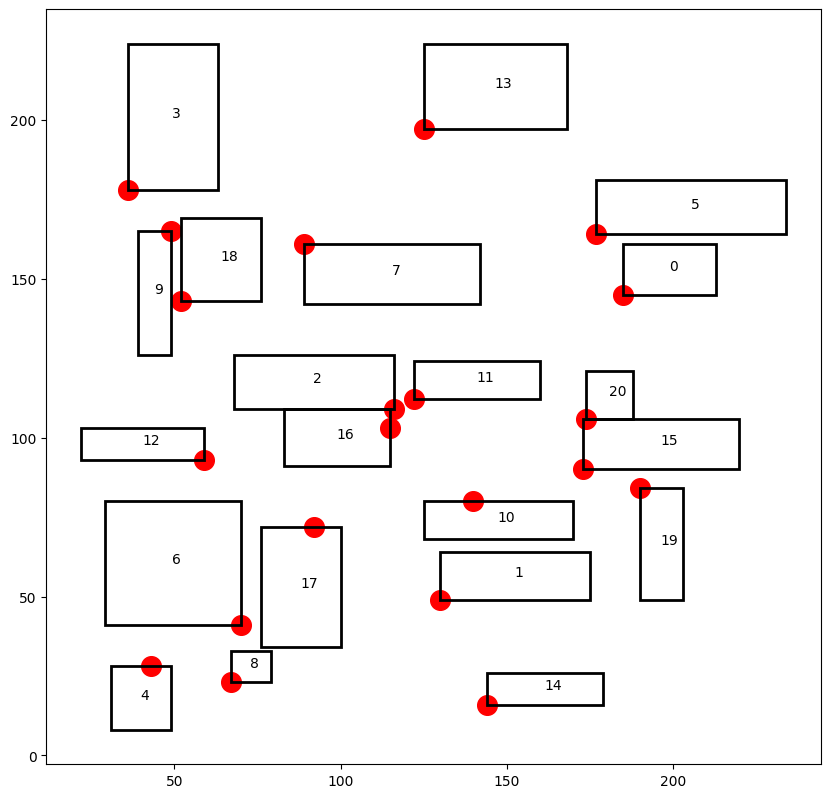

CPU times: user 5.79 s, sys: 15.8 ms, total: 5.8 s
Wall time: 5.88 s


In [96]:
%%time
draw_labels(boxes3)

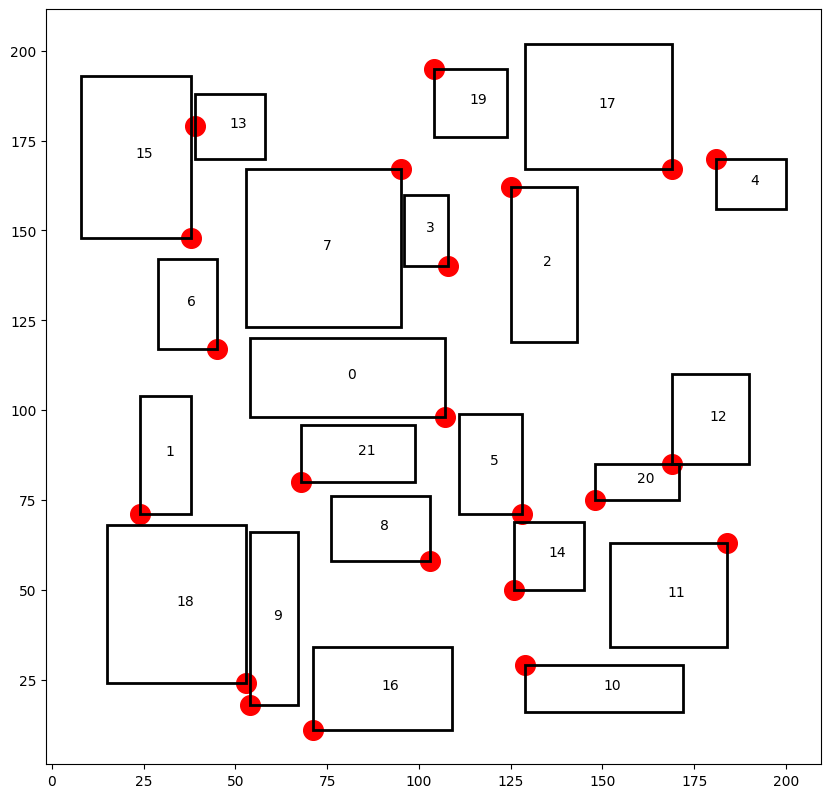

CPU times: user 45.1 s, sys: 98.4 ms, total: 45.2 s
Wall time: 45.5 s


In [97]:
%%time
draw_labels(boxes4)